In [34]:
from __future__ import print_function
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.__version__

'1.1.5'

In [35]:
import os
os.getcwd()

'/content'

In [36]:
#Mouting the drive to load a simple dataset stored on the google drive
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [37]:
#Loading a dataset into a dataframe
HTRU = pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/HTRU Data/HTRU_2.csv")
print('Dataset Loaded...')


Dataset Loaded...


In [38]:
# assign columns name
HTRU.columns = ['mean_profile', 'std_profile', 'kurtosis_profile', 'skewness_profile', 
              'mean_dmsnr', 'std_dmsnr', 'kurtosis_dmsnr', 'skewness_dmsnr', 'target']

Compare the accuracies of the clustering methods when performed on first four features i.e., (1, 2,3, and 4) versus the last four features i.e., 5, 6, 7, and 8. In the report, present an analysis on how these two sets of features perform compared to the full set of features (i.e., 1 through 8). Use both clustering methods for this part of the analysis. [60 points]


In [39]:
HRTU_df_second_four = HTRU[['mean_dmsnr', 'std_dmsnr', 'kurtosis_dmsnr', 'skewness_dmsnr', 'target']]

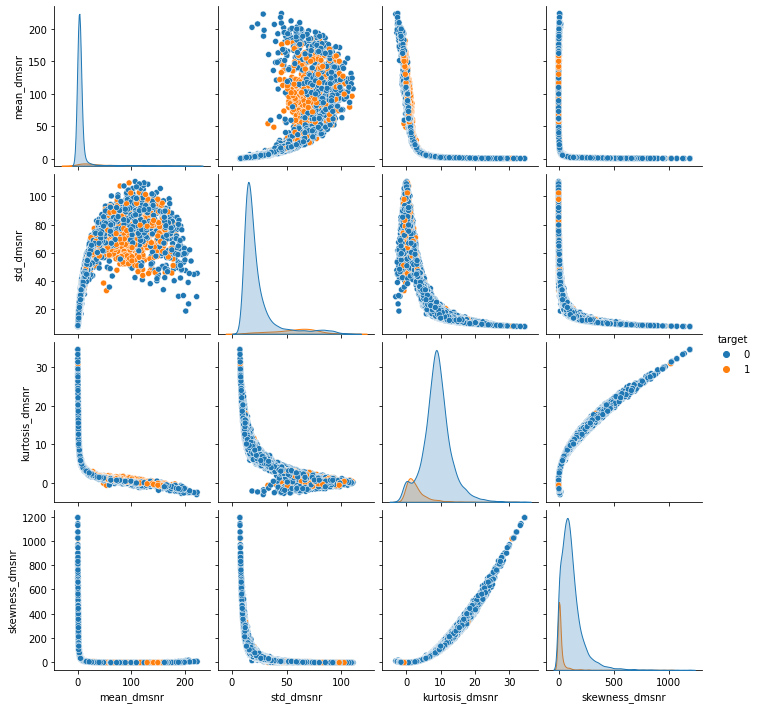

In [41]:
sns.pairplot(HRTU_df_second_four, hue='target')

In [42]:
HRTU_df_second_four_X = HRTU_df_second_four.drop(columns='target') 
HRTU_df_second_four_X.iloc[0:5]

,mean_dmsnr,std_dmsnr,kurtosis_dmsnr,skewness_dmsnr
0,1.677258,14.860146,10.576487,127.393580
1,3.121237,21.744669,7.735822,63.171909
2,3.642977,20.959280,6.896499,53.593661
3,1.178930,11.468720,14.269573,252.567306
4,1.636288,14.545074,10.621748,131.394004


In [43]:
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import contingency_matrix 

k-means in first four feature, let's find optimal k value

In [44]:
wcss = [] 
for i in range(1, 11): 
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(HRTU_df_second_four_X) 
    wcss.append(kmeans.inertia_)

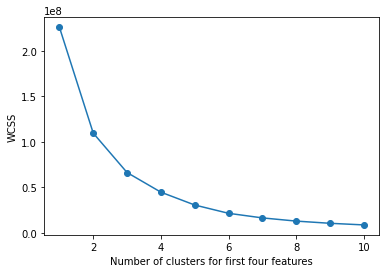

In [45]:
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Number of clusters for first four features')
plt.ylabel('WCSS') 
plt.show()

From here optimal value would be k=3, at k-3 elbow is creating

In [46]:
kmeans = KMeans(n_clusters = 3, random_state = 42).fit(HRTU_df_second_four_X)

In [47]:
#get predicted label by cluster
labels = pd.DataFrame(kmeans.labels_)
labels

,0
0,1
1,0
2,0
3,1
4,1
...,...
17892,1
17893,0
17894,0
17895,1


In [48]:
labeledCluster = pd.concat((HRTU_df_second_four_X, labels), axis=1)
labeledCluster = labeledCluster.rename({0:'labels'}, axis = 1)
labeledCluster.iloc[0:5]

,mean_dmsnr,std_dmsnr,kurtosis_dmsnr,skewness_dmsnr,labels
0,1.677258,14.860146,10.576487,127.393580,1
1,3.121237,21.744669,7.735822,63.171909,0
2,3.642977,20.959280,6.896499,53.593661,0
3,1.178930,11.468720,14.269573,252.567306,1
4,1.636288,14.545074,10.621748,131.394004,1


In [49]:
labeledCluster['labels'].value_counts()

0    10150
1     6834
2      913
Name: labels, dtype: int64

In [50]:
HTRU['target'].value_counts()

0    16258
1     1639
Name: target, dtype: int64

In [51]:
contingency_matrix(HTRU.target, kmeans.labels_)

array([[8582, 6772,  904],
       [1568,   62,    9]])

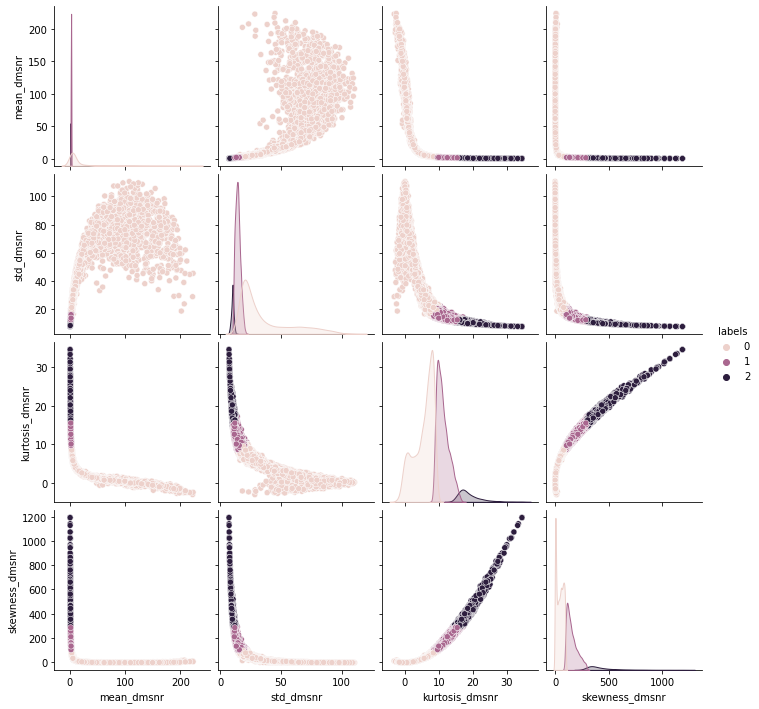

In [52]:
sns.pairplot(labeledCluster, hue='labels')

In [19]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

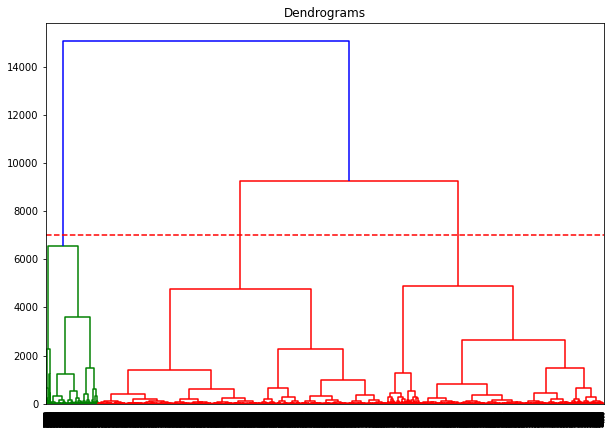

In [22]:
#create dendrogram
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dendrogram = sch.dendrogram(sch.linkage(HRTU_df_second_four_X, method='ward'))
plt.axhline(y=7000, color='r', linestyle='--')

In [24]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  
cluster.fit_predict(HRTU_df_second_four_X)

array([2, 1, 1, ..., 1, 2, 1])

In [26]:
labeledCluster = pd.concat((HRTU_df_second_four_X, pd.DataFrame(cluster.labels_,columns=[0])), axis=1)
labeledCluster = labeledCluster.rename({0:'labels'}, axis = 1)
labeledCluster.iloc[0:5]

,mean_dmsnr,std_dmsnr,kurtosis_dmsnr,skewness_dmsnr,labels
0,1.677258,14.860146,10.576487,127.393580,2
1,3.121237,21.744669,7.735822,63.171909,1
2,3.642977,20.959280,6.896499,53.593661,1
3,1.178930,11.468720,14.269573,252.567306,0
4,1.636288,14.545074,10.621748,131.394004,2


In [27]:
labeledCluster['labels'].value_counts()

2    9271
1    6953
0    1673
Name: labels, dtype: int64

In [28]:
contingency_matrix(HTRU.target, cluster.labels_)

array([[1655, 5428, 9175],
       [  18, 1525,   96]])

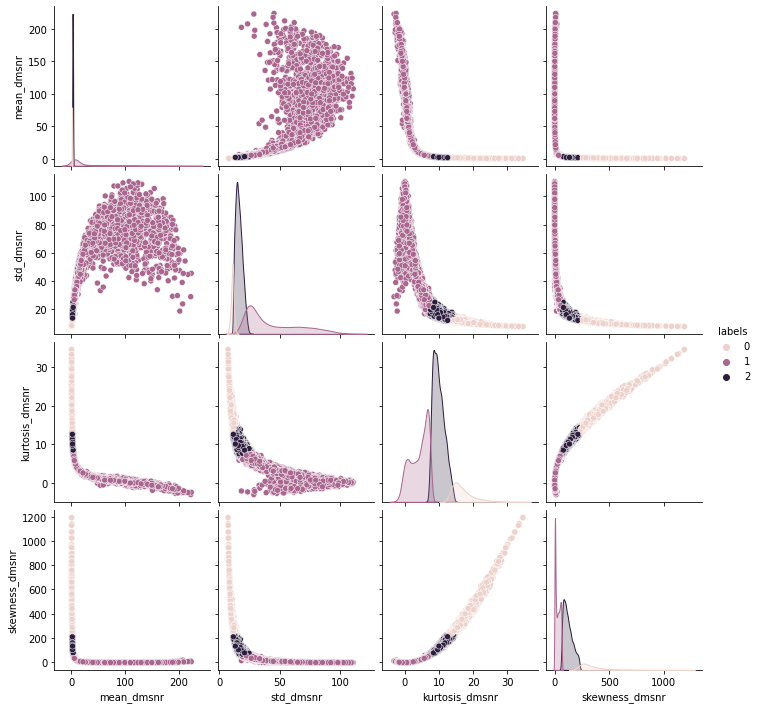

In [29]:
sns.pairplot(labeledCluster, hue='labels')